In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [9]:
import sys
sys.path.append("/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/Scripts/Functions")

In [26]:
from RMSE import gridded_RMSE
from RMSE import pooled_RMSE

BILINEAR INTERPOLATION BASELINE


TabsD gridded and pooled RMSE : only calculated for the testing set chosen using the splitting scheme from train test val.py and processed in Data_prep.ipynb

In [27]:
pred_path = '/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/data/processed/Bilinear/Test/features_tas_masked_bilinear_test.nc'
truth_path = '/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/data/processed/Bilinear/Test/targets_tas_masked_test.nc'
var1 = 'tas'
var2 = 'TabsD'

rmse_grid_tabsd_bilinear = gridded_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(rmse_grid_tabsd_bilinear)

<xarray.DataArray (N: 265, E: 370)> Size: 392kB
dask.array<astype, shape=(265, 370), dtype=float32, chunksize=(265, 370), chunktype=numpy.ndarray>
Coordinates:
    lon      (N, E) float32 392kB 5.828 5.841 5.854 5.867 ... 10.68 10.69 10.7
    lat      (N, E) float32 392kB 45.68 45.68 45.68 45.68 ... 48.02 48.02 48.02
  * E        (E) float64 3kB 2.474e+06 2.476e+06 ... 2.842e+06 2.844e+06
  * N        (N) float64 2kB 1.06e+06 1.06e+06 1.062e+06 ... 1.322e+06 1.324e+06


In [28]:
rmse_pooled_tabsd_bilinear= pooled_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})
print(rmse_pooled_tabsd_bilinear.compute())

<xarray.DataArray ()> Size: 4B
array(2.0581782, dtype=float32)


In [29]:
#Plotting the RMSE on a gridded map of switrzerland 

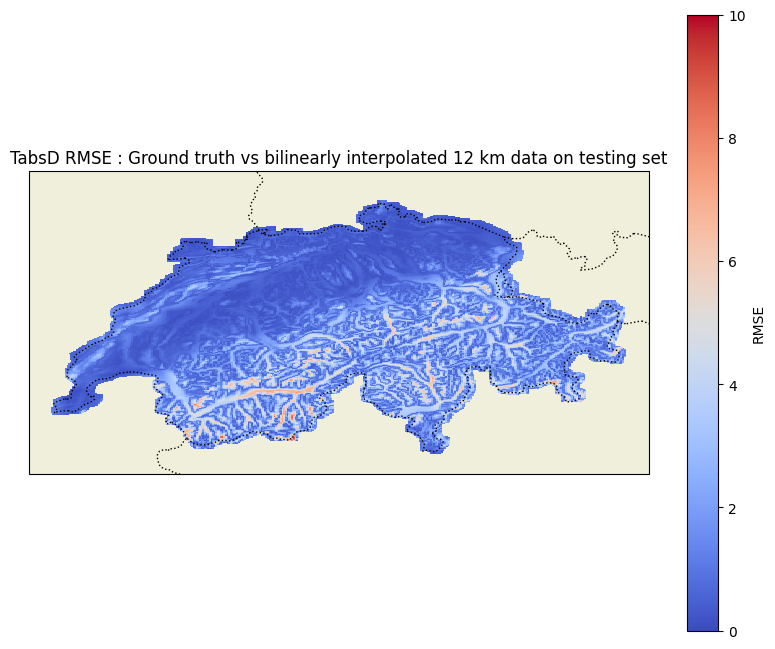

In [30]:
fig, ax = plt.subplots(figsize=(10, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})

p = ax.pcolormesh(rmse_grid_tabsd_bilinear['lon'], rmse_grid_tabsd_bilinear['lat'], rmse_grid_tabsd_bilinear,
                  transform=ccrs.PlateCarree(),
                  shading='auto', cmap='coolwarm', vmin=0, vmax=10)

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

cbar = plt.colorbar(p, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('RMSE')

ax.set_extent([
    rmse_grid_tabsd_bilinear['lon'].values.min(), rmse_grid_tabsd_bilinear['lon'].values.max(),
    rmse_grid_tabsd_bilinear['lat'].values.min(), rmse_grid_tabsd_bilinear['lat'].values.max()
], crs=ccrs.PlateCarree())

plt.title("TabsD RMSE : Ground truth vs bilinearly interpolated 12 km data on testing set")

plt.show()

PRECIPITATION BILINEAR BASELINE


In [31]:
pred_path = '/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/data/processed/Bilinear/Test/features_precip_masked_bilinear_test.nc'
truth_path = '/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/data/processed/Bilinear/Test/targets_precip_masked_test.nc'
var1 = 'pr'
var2 = 'RhiresD'

rmse_grid_precip_bilinear = gridded_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(rmse_grid_precip_bilinear)

<xarray.DataArray (N: 265, E: 370)> Size: 392kB
dask.array<astype, shape=(265, 370), dtype=float32, chunksize=(265, 370), chunktype=numpy.ndarray>
Coordinates:
    lon      (N, E) float32 392kB 5.828 5.841 5.854 5.867 ... 10.68 10.69 10.7
    lat      (N, E) float32 392kB 45.68 45.68 45.68 45.68 ... 48.02 48.02 48.02
  * E        (E) float64 3kB 2.474e+06 2.476e+06 ... 2.842e+06 2.844e+06
  * N        (N) float64 2kB 1.06e+06 1.06e+06 1.062e+06 ... 1.322e+06 1.324e+06


In [32]:
rmse_pooled_precip_bilinear= pooled_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})
print(rmse_pooled_precip_bilinear.compute())

<xarray.DataArray ()> Size: 4B
array(3.246501, dtype=float32)


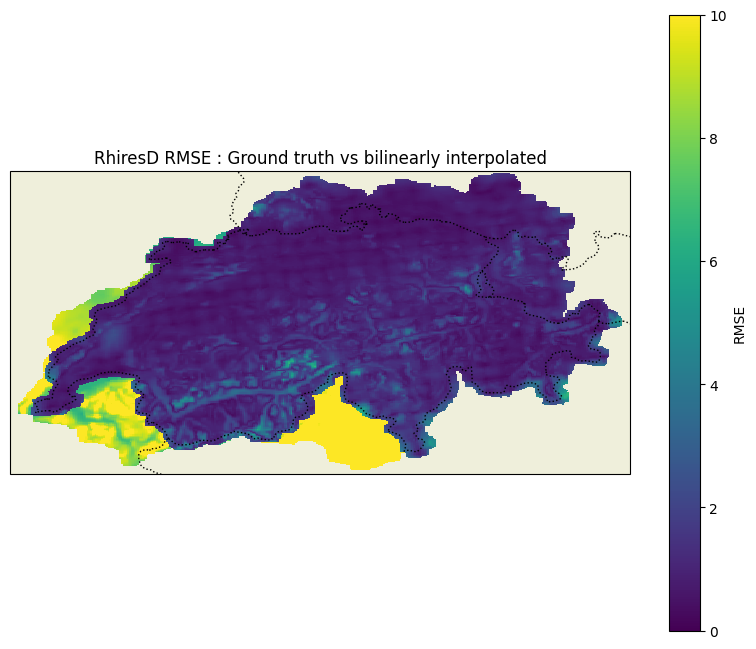

In [33]:

fig, ax = plt.subplots(figsize=(10, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})

p = ax.pcolormesh(rmse_grid_precip_bilinear['lon'], rmse_grid_precip_bilinear['lat'], rmse_grid_precip_bilinear,
                  transform=ccrs.PlateCarree(),
                  shading='auto', cmap='viridis', vmin=0, vmax=10)

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

cbar = plt.colorbar(p, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('RMSE')

ax.set_extent([
    rmse_grid_precip_bilinear['lon'].values.min(), rmse_grid_precip_bilinear['lon'].values.max(),
    rmse_grid_precip_bilinear['lat'].values.min(), rmse_grid_precip_bilinear['lat'].values.max()
], crs=ccrs.PlateCarree())

# Title
plt.title("RhiresD RMSE : Ground truth vs bilinearly interpolated")

plt.show()

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

BICUBIC BASELINES 

RhiresD and TabsD, pooled and gridded RMSE

TabsD gridded and pooled RMSE : only calculated for the testing set chosen using the splitting scheme from train test val.py and processed in Data_prep.ipynb

In [17]:
pred_path = '/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/data/processed/Bicubic/Test/features_tas_masked_bicubic_test.nc'
truth_path = '/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/data/processed/Bicubic/Test/targets_tas_masked_test.nc'
var1 = 'tas'
var2 = 'TabsD'

rmse_grid_tabsd_bicubic = gridded_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(rmse_grid_tabsd_bicubic)

<xarray.DataArray (N: 265, E: 370)> Size: 392kB
dask.array<astype, shape=(265, 370), dtype=float32, chunksize=(265, 370), chunktype=numpy.ndarray>
Coordinates:
    lon      (N, E) float32 392kB 5.828 5.841 5.854 5.867 ... 10.68 10.69 10.7
    lat      (N, E) float32 392kB 45.68 45.68 45.68 45.68 ... 48.02 48.02 48.02
  * E        (E) float64 3kB 2.474e+06 2.476e+06 ... 2.842e+06 2.844e+06
  * N        (N) float64 2kB 1.06e+06 1.06e+06 1.062e+06 ... 1.322e+06 1.324e+06


In [18]:
rmse_pooled_tabsd_bicubic= pooled_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})
print(rmse_pooled_tabsd_bicubic.compute())

<xarray.DataArray ()> Size: 4B
array(1.9994707, dtype=float32)


In [19]:
#Plotting the RMSE on a gridded map of switrzerland 

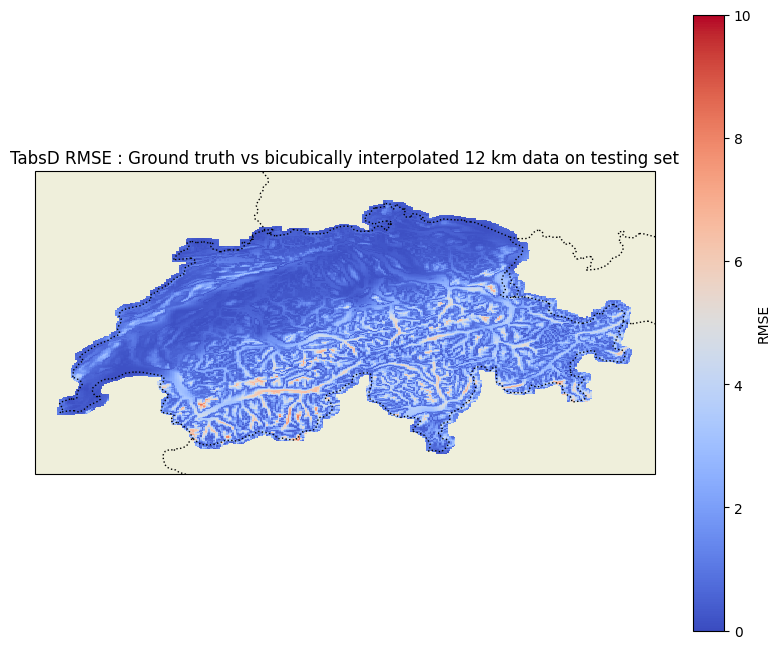

In [20]:
fig, ax = plt.subplots(figsize=(10, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})

p = ax.pcolormesh(rmse_grid_tabsd_bicubic['lon'], rmse_grid_tabsd_bicubic['lat'], rmse_grid_tabsd_bicubic,
                  transform=ccrs.PlateCarree(),
                  shading='auto', cmap='coolwarm', vmin=0, vmax=10)

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

cbar = plt.colorbar(p, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('RMSE')

ax.set_extent([
    rmse_grid_tabsd_bicubic['lon'].values.min(), rmse_grid_tabsd_bicubic['lon'].values.max(),
    rmse_grid_tabsd_bicubic['lat'].values.min(), rmse_grid_tabsd_bicubic['lat'].values.max()
], crs=ccrs.PlateCarree())

plt.title("TabsD RMSE : Ground truth vs bicubically interpolated 12 km data on testing set")

plt.show()


For precipitation 

In [22]:
pred_path = '/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/data/processed/Bicubic/Test/features_precip_masked_bicubic_test.nc'
truth_path = '/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/data/processed/Bicubic/Test/targets_precip_masked_test.nc'
var1 = 'pr'
var2 = 'RhiresD'

rmse_grid_precip_bicubic = gridded_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(rmse_grid_precip_bicubic)

<xarray.DataArray (N: 265, E: 370)> Size: 392kB
dask.array<astype, shape=(265, 370), dtype=float32, chunksize=(265, 370), chunktype=numpy.ndarray>
Coordinates:
    lon      (N, E) float32 392kB 5.828 5.841 5.854 5.867 ... 10.68 10.69 10.7
    lat      (N, E) float32 392kB 45.68 45.68 45.68 45.68 ... 48.02 48.02 48.02
  * E        (E) float64 3kB 2.474e+06 2.476e+06 ... 2.842e+06 2.844e+06
  * N        (N) float64 2kB 1.06e+06 1.06e+06 1.062e+06 ... 1.322e+06 1.324e+06


In [23]:
rmse_pooled_precip_bicubic= pooled_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})
print(rmse_pooled_precip_bicubic.compute())

<xarray.DataArray ()> Size: 4B
array(3.2052567, dtype=float32)


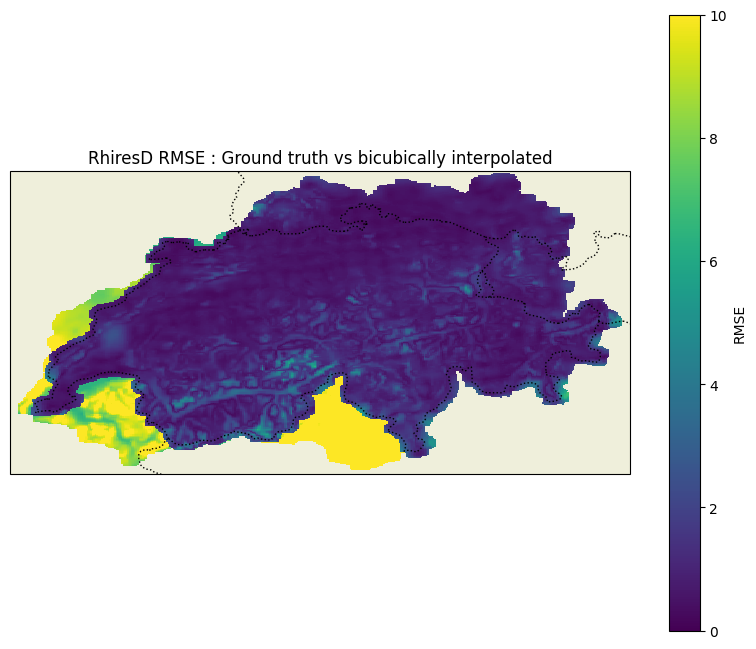

In [25]:

fig, ax = plt.subplots(figsize=(10, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})

p = ax.pcolormesh(rmse_grid_precip_bicubic['lon'], rmse_grid_precip_bicubic['lat'], rmse_grid_precip_bicubic,
                  transform=ccrs.PlateCarree(),
                  shading='auto', cmap='viridis', vmin=0, vmax=10)

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

cbar = plt.colorbar(p, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('RMSE')

ax.set_extent([
    rmse_grid_precip_bicubic['lon'].values.min(), rmse_grid_precip_bicubic['lon'].values.max(),
    rmse_grid_precip_bicubic['lat'].values.min(), rmse_grid_precip_bicubic['lat'].values.max()
], crs=ccrs.PlateCarree())

# Title
plt.title("RhiresD RMSE : Ground truth vs bicubically interpolated")

plt.show()

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCoefficient of Determination xxxxxxxxxxxxxxxxxxxxxxxxxx

COEFFICIENT OF DETERMINATION (R squared)

In [34]:
from R_squared import gridded_R_squared

TEMPERATURE (BILINEAR BASELINE)

In [36]:
pred_path = '/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/data/processed/Bilinear/Test/features_tas_masked_bilinear_test.nc'
truth_path = '/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/data/processed/Bilinear/Test/targets_tas_masked_test.nc'
var1 = 'tas'
var2 = 'TabsD'

R_grid_tabsd_bilinear = gridded_R_squared(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(R_grid_tabsd_bilinear)

<xarray.DataArray (N: 265, E: 370)> Size: 392kB
dask.array<astype, shape=(265, 370), dtype=float32, chunksize=(265, 370), chunktype=numpy.ndarray>
Coordinates:
    lon      (N, E) float32 392kB 5.828 5.841 5.854 5.867 ... 10.68 10.69 10.7
    lat      (N, E) float32 392kB 45.68 45.68 45.68 45.68 ... 48.02 48.02 48.02
  * E        (E) float64 3kB 2.474e+06 2.476e+06 ... 2.842e+06 2.844e+06
  * N        (N) float64 2kB 1.06e+06 1.06e+06 1.062e+06 ... 1.322e+06 1.324e+06


In [ ]:
fig, ax = plt.subplots(figsize=(10, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})

p = ax.pcolormesh(R_grid_tabsd_bilinear['lon'], R_grid_tabsd_bilinear['lat'], R_grid_tabsd_bilinear,
                  transform=ccrs.PlateCarree(),
                  shading='auto', cmap='coolwarm', vmin=-1, vmax=1)

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

cbar = plt.colorbar(p, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('R squared')

ax.set_extent([
    R_grid_tabsd_bilinear['lon'].values.min(), R_grid_tabsd_bilinear['lon'].values.max(),
    R_grid_tabsd_bilinear['lat'].values.min(), R_grid_tabsd_bilinear['lat'].values.max()
], crs=ccrs.PlateCarree())

# Title
plt.title("TabsD Coeff of Determination : Ground truth vs bilinearly interpolated")

plt.show()

PRECIPITATION 


In [52]:
pred_path = '/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/data/processed/RhiresD_1971_2022_bilinear.nc'
truth_path = '/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/data/raw/RhiresD_1971_2022.nc'
var1 = 'pr'
var2 = 'RhiresD'

R_grid_rhiresd_bilinear = gridded_R_squared(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(R_grid_rhiresd_bilinear)

<xarray.DataArray (N: 265, E: 370)> Size: 392kB
dask.array<sub, shape=(265, 370), dtype=float32, chunksize=(265, 370), chunktype=numpy.ndarray>
Coordinates:
    lon      (N, E) float32 392kB 5.828 5.841 5.854 5.867 ... 10.68 10.69 10.7
    lat      (N, E) float32 392kB 45.68 45.68 45.68 45.68 ... 48.02 48.02 48.02
  * E        (E) float64 3kB 2.474e+06 2.476e+06 ... 2.842e+06 2.844e+06
  * N        (N) float64 2kB 1.06e+06 1.06e+06 1.062e+06 ... 1.322e+06 1.324e+06


Text(0.5, 1.0, 'RhiresD Coeff of Determination : Ground truth vs bilinearly interpolated')

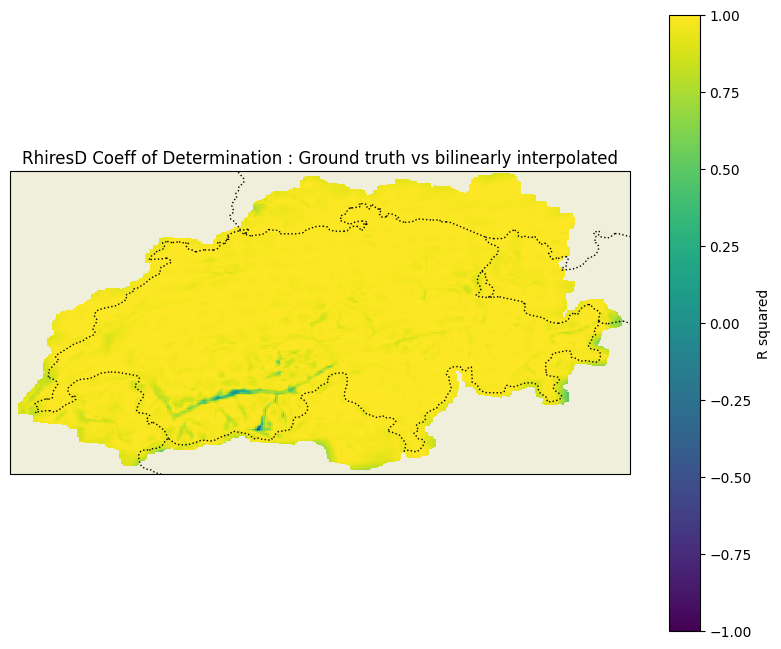

In [53]:
fig, ax = plt.subplots(figsize=(10, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})

p = ax.pcolormesh(R_grid_rhiresd_bilinear['lon'], R_grid_rhiresd_bilinear['lat'], R_grid_rhiresd_bilinear,
                  transform=ccrs.PlateCarree(),
                  shading='auto', cmap='viridis', vmin=-1, vmax=1)

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

cbar = plt.colorbar(p, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('R squared')

ax.set_extent([
    R_grid_rhiresd_bilinear['lon'].values.min(), R_grid_rhiresd_bilinear['lon'].values.max(),
    R_grid_rhiresd_bilinear['lat'].values.min(), R_grid_rhiresd_bilinear['lat'].values.max()
], crs=ccrs.PlateCarree())

# Title
plt.title("RhiresD Coeff of Determination : Ground truth vs bilinearly interpolated")

BICUBIC INTERPOLATION : COEFFICIENT OF DETERMINATION

In [54]:
pred_path = '/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/data/processed/TabsD_1971_2022_bicubic.nc'
truth_path = '/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/data/raw/TabsD_1971_2022.nc'
var1 = 'tas'
var2 = 'TabsD'

R_grid_tabsd_bicubic = gridded_R_squared(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(R_grid_tabsd_bicubic)

<xarray.DataArray (N: 265, E: 370)> Size: 392kB
dask.array<sub, shape=(265, 370), dtype=float32, chunksize=(265, 370), chunktype=numpy.ndarray>
Coordinates:
    lon      (N, E) float32 392kB 5.828 5.841 5.854 5.867 ... 10.68 10.69 10.7
    lat      (N, E) float32 392kB 45.68 45.68 45.68 45.68 ... 48.02 48.02 48.02
  * E        (E) float64 3kB 2.474e+06 2.476e+06 ... 2.842e+06 2.844e+06
  * N        (N) float64 2kB 1.06e+06 1.06e+06 1.062e+06 ... 1.322e+06 1.324e+06


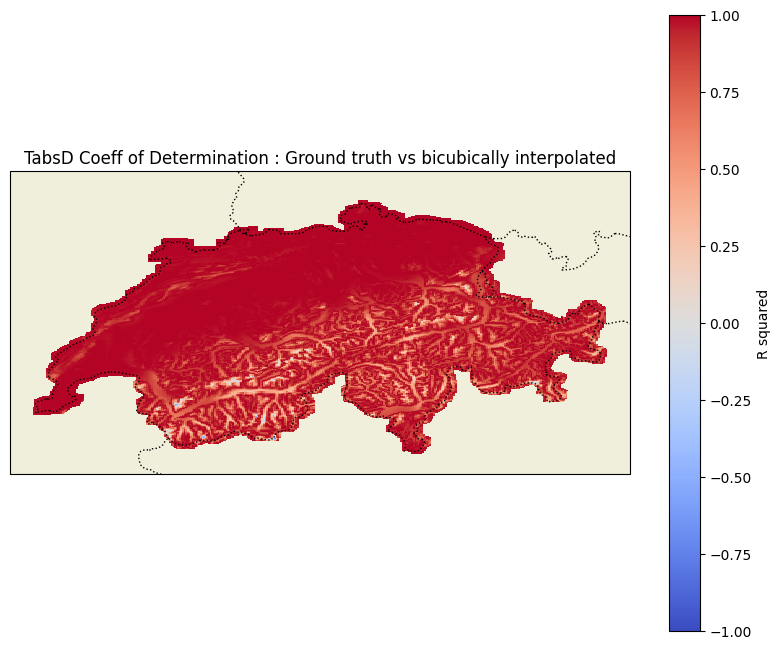

In [55]:
fig, ax = plt.subplots(figsize=(10, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})

p = ax.pcolormesh(R_grid_tabsd_bicubic['lon'], R_grid_tabsd_bicubic['lat'], R_grid_tabsd_bicubic,
                  transform=ccrs.PlateCarree(),
                  shading='auto', cmap='coolwarm', vmin=-1, vmax=1)

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

cbar = plt.colorbar(p, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('R squared')

ax.set_extent([
    R_grid_tabsd_bicubic['lon'].values.min(), R_grid_tabsd_bicubic['lon'].values.max(),
    R_grid_tabsd_bicubic['lat'].values.min(), R_grid_tabsd_bicubic['lat'].values.max()
], crs=ccrs.PlateCarree())

# Title
plt.title("TabsD Coeff of Determination : Ground truth vs bicubically interpolated")

plt.show()

PRECIPITATION BICUBIC COEFF of DETERMINATION

In [56]:
pred_path = '/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/data/processed/RhiresD_1971_2022_bicubic.nc'
truth_path = '/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling/data/raw/RhiresD_1971_2022.nc'
var1 = 'pr'
var2 = 'RhiresD'

R_grid_rhiresd_bicubic = gridded_R_squared(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(R_grid_rhiresd_bicubic)

<xarray.DataArray (N: 265, E: 370)> Size: 392kB
dask.array<sub, shape=(265, 370), dtype=float32, chunksize=(265, 370), chunktype=numpy.ndarray>
Coordinates:
    lon      (N, E) float32 392kB 5.828 5.841 5.854 5.867 ... 10.68 10.69 10.7
    lat      (N, E) float32 392kB 45.68 45.68 45.68 45.68 ... 48.02 48.02 48.02
  * E        (E) float64 3kB 2.474e+06 2.476e+06 ... 2.842e+06 2.844e+06
  * N        (N) float64 2kB 1.06e+06 1.06e+06 1.062e+06 ... 1.322e+06 1.324e+06


Text(0.5, 1.0, 'RhiresD Coeff of Determination : Ground truth vs bicubically interpolated')

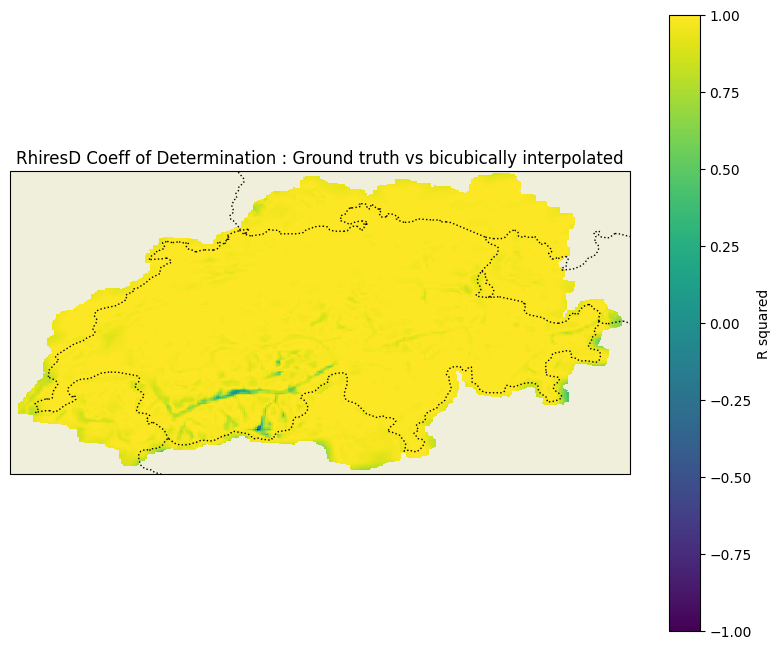

In [57]:
fig, ax = plt.subplots(figsize=(10, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})

p = ax.pcolormesh(R_grid_rhiresd_bicubic['lon'], R_grid_rhiresd_bicubic['lat'], R_grid_rhiresd_bicubic,
                  transform=ccrs.PlateCarree(),
                  shading='auto', cmap='viridis', vmin=-1, vmax=1)

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

cbar = plt.colorbar(p, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('R squared')

ax.set_extent([
    R_grid_rhiresd_bicubic['lon'].values.min(), R_grid_rhiresd_bicubic['lon'].values.max(),
    R_grid_rhiresd_bicubic['lat'].values.min(), R_grid_rhiresd_bicubic['lat'].values.max()
], crs=ccrs.PlateCarree())

# Title
plt.title("RhiresD Coeff of Determination : Ground truth vs bicubically interpolated")